In [20]:
#獨黨
import numpy as np
x_train = np.loadtxt('x_train.csv', delimiter=',')
x_test = np.loadtxt('X_test.csv', delimiter=',')
y_train= np.loadtxt('y_train.csv', delimiter=',')
y_test = np.loadtxt('y_test.csv', delimiter=',')

(array([  6.,   6.,   7.,  11.,   8.,  17.,  16.,   9.,  13.,  22.,   1.,
          3.,   0.,   0.,   1.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <a list of 15 Patch objects>)

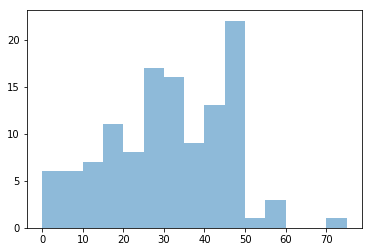

In [21]:
#開始觀察資料決定區間
%matplotlib inline
import matplotlib.pyplot as plt
bins = np.arange(0, 80,5)
plt.hist(y_train, bins = bins, alpha = 0.5)

In [22]:
np.average(y_train)

30.583333333333332

In [23]:
np.std(y_train)

14.515843834315049

In [25]:
#轉變Ｘ的型態
X = np.reshape(x_train,(120,15,1))#(x_train的個數, 15, 1)
X_test = np.reshape(x_test,(44,15,1))#(x_test的個數, 15, 1)

In [ ]:
X

In [26]:
#輸出這邊我將資料分成群
y_train[y_train<15] = 0
y_train[(y_train>=15) & (y_train<25)] = 1
y_train[(y_train>=25) & (y_train<35)] = 2
y_train[(y_train>=35) & (y_train<45)] = 3
y_train[(y_train>=45)] = 4

In [27]:
y_test[y_test<15] = 0
y_test[(y_test>=15) & (y_test<25)] = 1
y_test[(y_test>=25) & (y_test<35)] = 2
y_test[(y_test>=35) & (y_test<45)] = 3
y_test[(y_test>=45)] = 4

In [ ]:
len(y_train)

In [28]:
#將Ｙ轉換型態
from keras.utils import np_utils
y_train_trans = np_utils.to_categorical(y_train,5)
y_test_trans = np_utils.to_categorical(y_test,5)

In [29]:
from keras.models import Sequential
from keras.layers import Dense,Activation, LSTM, Dropout
from keras.optimizers import SGD
model = Sequential()
model.add(LSTM(256, activation="sigmoid", input_shape=(X.shape[1], X.shape[2]), recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(y_train_trans.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 265,477
Trainable params: 265,477
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X, y_train_trans,batch_size=10, epochs=20, validation_data=(X_test, y_test_trans))

Train on 120 samples, validate on 44 samples
Epoch 1/20
120/120 [==============================] - 1s - loss: 1.8414 - acc: 0.1083 - val_loss: 1.8813 - val_acc: 0.0682

In [31]:
score = model.evaluate(X_test, y_test_trans, verbose=0)
score

[1.7642751715400002, 0.18181817910887979]

In [32]:
result = model.predict(X_test)

In [33]:
from ipywidgets import interact_manual
def identify(testnumber):
    print("神經網路判斷為：",result[testnumber])
    print("正確答案是:",y_test_trans[testnumber])
interact_manual(identify, testnumber=(0,44))

神經網路判斷為： [ 0.23730861  0.21455747  0.33236325  0.0571731   0.15859753]
正確答案是: [ 0.  1.  0.  0.  0.]
